In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [16]:
df = pd.read_csv('../../Data/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [17]:
reading_times = df.groupby(['id', 'group'])['duration'].mean()
reading_times = reading_times.reset_index()
reading_times.head()

,id,group,duration
0,182960,experiment,27.520070
1,183055,control,67.836190
2,183260,control,107.331484
3,183267,experiment,231.040852
4,183615,experiment,24.627594


In [18]:
# Compute the observed difference in average reading duration
control_mean = reading_times[reading_times['group'] == 'control']['duration'].mean()
experiment_mean = reading_times[reading_times['group'] == 'experiment']['duration'].mean()
observed_difference = experiment_mean - control_mean
print('observed difference:', observed_difference)

observed difference: 15.489975679097256


(array([8.000e+00, 1.240e+02, 6.890e+02, 1.969e+03, 2.982e+03, 2.563e+03,
        1.283e+03, 3.390e+02, 4.100e+01, 2.000e+00]),
 array([ 9.06374277, 10.41928146, 11.77482015, 13.13035884, 14.48589753,
        15.84143623, 17.19697492, 18.55251361, 19.9080523 , 21.26359099,
        22.61912969]),
 <BarContainer object of 10 artists>)

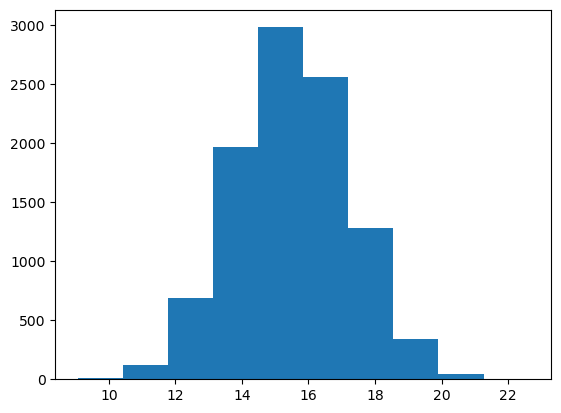

In [19]:
# Create a sampling distribution of the difference in proportions:
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    reading_times = sample.groupby(['id', 'group'])['duration'].mean()
    reading_times = reading_times.reset_index()
    control_mean = reading_times[reading_times['group'] == 'control']['duration'].mean()
    experiment_mean = reading_times[reading_times['group'] == 'experiment']['duration'].mean()
    diffs.append(experiment_mean - control_mean)

# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

p-value: 0.0


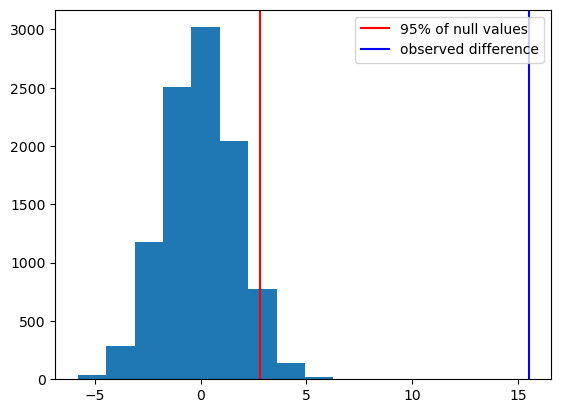

In [20]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
print('p-value:', (null_vals > observed_difference).mean())

# Plot the null distribution
plt.hist(null_vals)
plt.axvline(x=np.percentile(null_vals, 95), color='red')
plt.axvline(x=observed_difference, color='blue')
plt.legend(['95% of null values', 'observed difference'])
plt.show()

With a p-value less than 0.05, it seems unlikely that our statistics is from the null. Thus, our finding is significant, and we reject the $H_0$. We, therefore, implement the change.